#**Dataset Description**

Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code | 0 Female: 1 Male

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Import Library

In [338]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
import pickle


#Miscellaneous Utilitiy Libraries--------------------------------------
from sklearn.metrics import classification_report, confusion_matrix


In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [340]:
dataset = 'https://raw.githubusercontent.com/timothyel/DigitalSkola-FinalProj/main/CVD.csv'

# Read Dataset

In [341]:
data = pd.read_csv(dataset)
df = data.copy()

# Data Cleaning

## Check Missing Value

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


the dataset doesn't have missing value

In [343]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


# Drop irrelevant column

In [344]:
df.drop('id',axis=1, inplace=True)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


# Column Manipulation

In [346]:
df.rename({'ap_hi': 'systolic','ap_lo': 'diastolic','Unnamed: 0':'id'},axis=1,inplace=True)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   systolic     70000 non-null  float64
 6   diastolic    70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


There is no missing value

In [348]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [349]:
#category column
catcol = ['gender','cholesterol','smoke','alco','active','gluc']
#numerical column
numcol = ['age','height','weight','systolic','diastolic']

# EDA

In [350]:
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### Categorical Column Dist

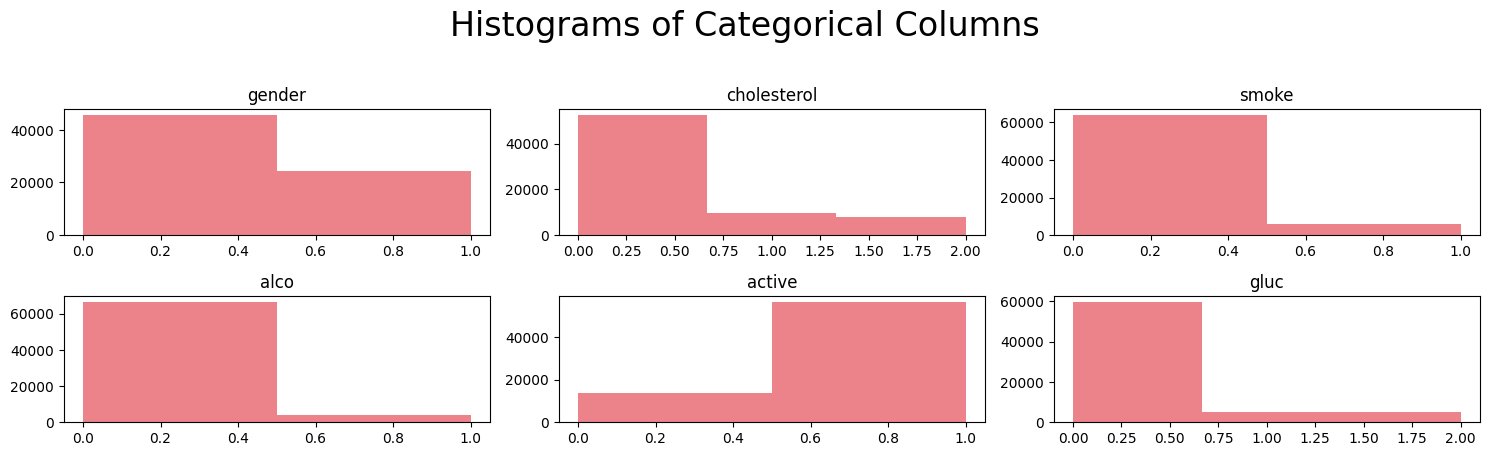

In [351]:
# Pilih kolom-kolom kategorikal yang ingin ditampilkan dalam histogram
selected_columns = catcol

dataset2 = df[selected_columns]

# Plot Histogram
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Categorical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(dataset2.columns.values[i])

    # Tentukan jumlah bins untuk histogram
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#ec838a')

plt.tight_layout()
plt.show()

#### Numerical Column Dist

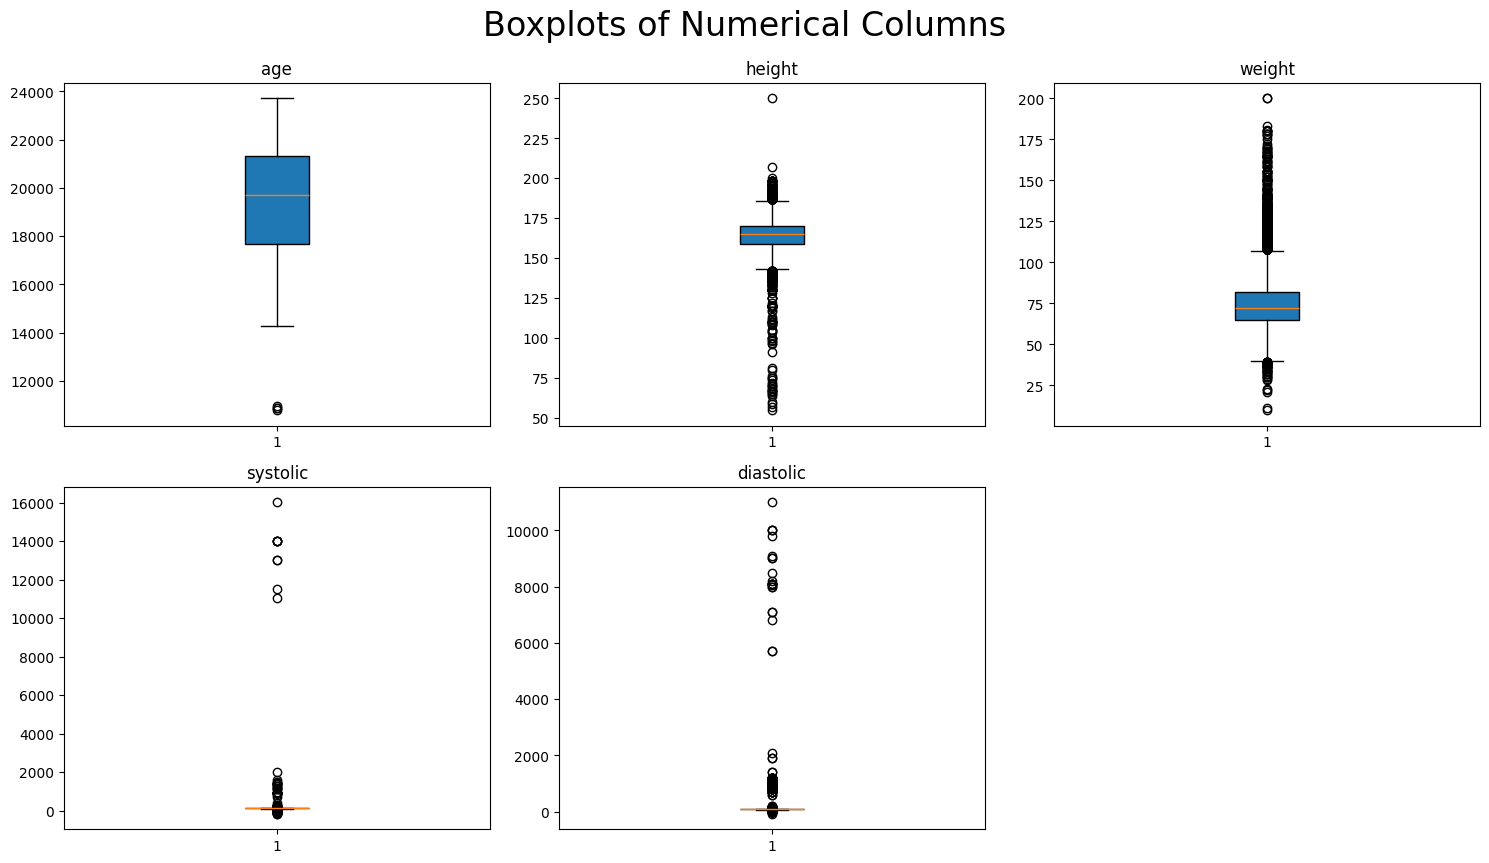

In [352]:
# Pilih kolom-kolom numerik yang ingin ditampilkan dalam boxplot
selected_columns = numcol
dataset2 = df[selected_columns]

# Plot boxplot
fig = plt.figure(figsize=(15, 25))
plt.suptitle('Boxplots of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(dataset2.columns.values[i])

    # Plot boxplot
    plt.boxplot(dataset2.iloc[:, i], patch_artist=True)
    plt.tight_layout()

plt.show()

There is a lot of outlier that should be treated first

## Check Outlier

In [353]:
selected_columns = numcol
dataset2 = df[selected_columns]

# Function
def percentage_of_outliers(data):
    outlier_percentages = {}
    total_samples = len(data)

    for column in data.columns:
        # IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Upper bound & Lower bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Percentage of outlier
        outlier_count = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
        outlier_percentage = (outlier_count / total_samples) * 100
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

# total percentage outlier
outlier_percentages = percentage_of_outliers(dataset2)

# show result
for column, percentage in outlier_percentages.items():
    print(f"Total outlier in {column}: {percentage:.2f}%")

Total outlier in age: 0.01%
Total outlier in height: 0.74%
Total outlier in weight: 2.60%
Total outlier in systolic: 2.05%
Total outlier in diastolic: 6.62%


since total outlier is conderably small, we can drop them

## Remove Outlier

In [354]:
df2 = df.copy()

In [355]:
# def function
def remove_rows_with_outliers(data, num_columns):
    cleaned_data = df2.copy()

    for column in num_columns:
        # Hitung IQR
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas atas dan batas bawah untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outlier
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    return cleaned_data

# numcol
df_cleaned_numcol = remove_rows_with_outliers(df, numcol)

# Before & After
print("Jumlah baris sebelum menghapus outlier:", len(df))
print("Jumlah baris setelah menghapus outlier:", len(df_cleaned_numcol))

Jumlah baris sebelum menghapus outlier: 70000
Jumlah baris setelah menghapus outlier: 62502


In [356]:
df_cleaned_numcol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.7 MB


In [357]:
df2 = df_cleaned_numcol

In [358]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.7 MB


### Recheck Data Distribution

#### Class Distribution

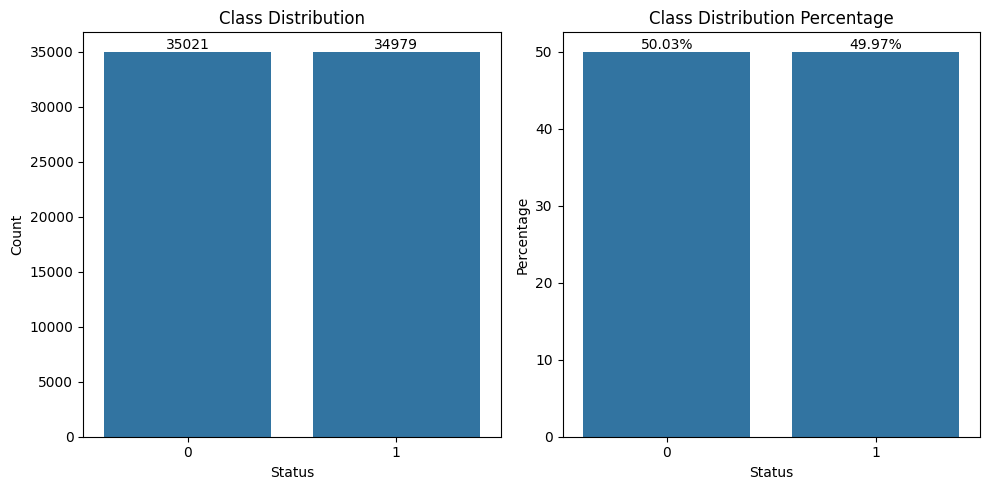

In [359]:
# Grouping based on 'cardio' and counting the number of 'id' in each group
result = df.groupby(['cardio'])[['id']].agg('count').reset_index()
result = result.rename(columns={'id': 'Count'})

# Calculating the percentage
result['Percentage'] = result['Count'] / result['Count'].sum() * 100

# Creating subplots with two bar plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar plot for absolute count
sns.barplot(x='cardio', y='Count', data=result, ax=axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')

# Adding annotations on each bar (absolute count)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Bar plot for percentage
sns.barplot(x='cardio', y='Percentage', data=result, ax=axes[1])
axes[1].set_title('Class Distribution Percentage')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Percentage')

# Adding annotations on each bar (percentage)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Displaying the plot
plt.tight_layout()
plt.show()

There is no imbalanceness in the target variable

#### Categorical Column Dist

In [360]:
pluscol = ['cholesterol','gluc']
df2[pluscol] = df2[pluscol]+1

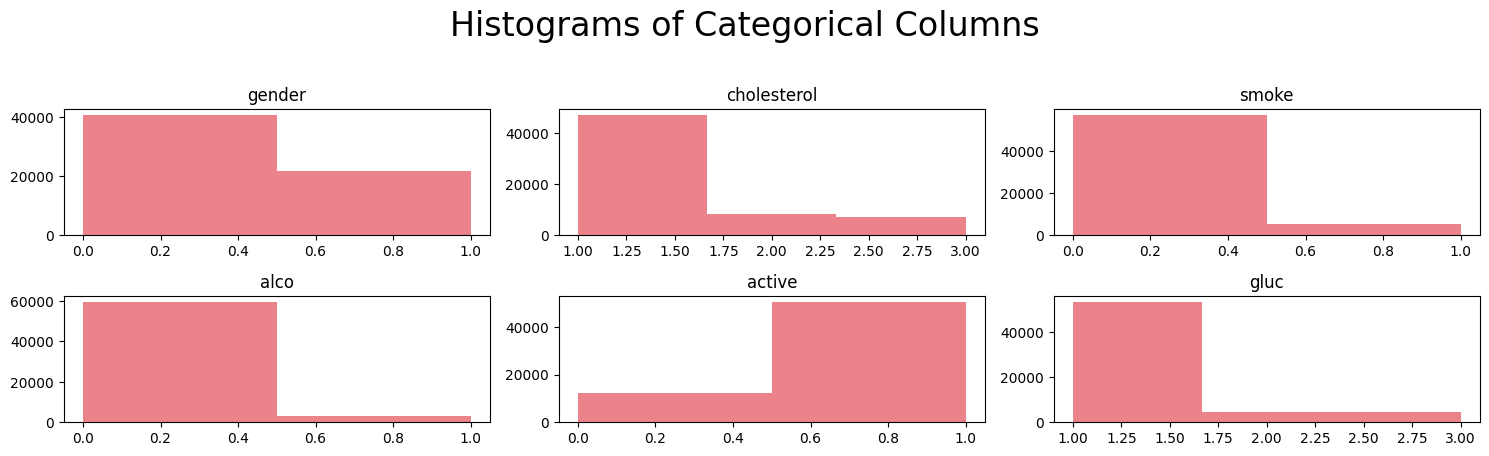

In [361]:
# Pilih kolom-kolom kategorikal yang ingin ditampilkan dalam histogram
selected_columns = catcol

dataset2 = df2[selected_columns]

# Plot Histogram
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Categorical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(dataset2.columns.values[i])

    # Tentukan jumlah bins untuk histogram
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#ec838a')

plt.tight_layout()
plt.show()

In [362]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.7 MB


## Recheck numerical column distribution

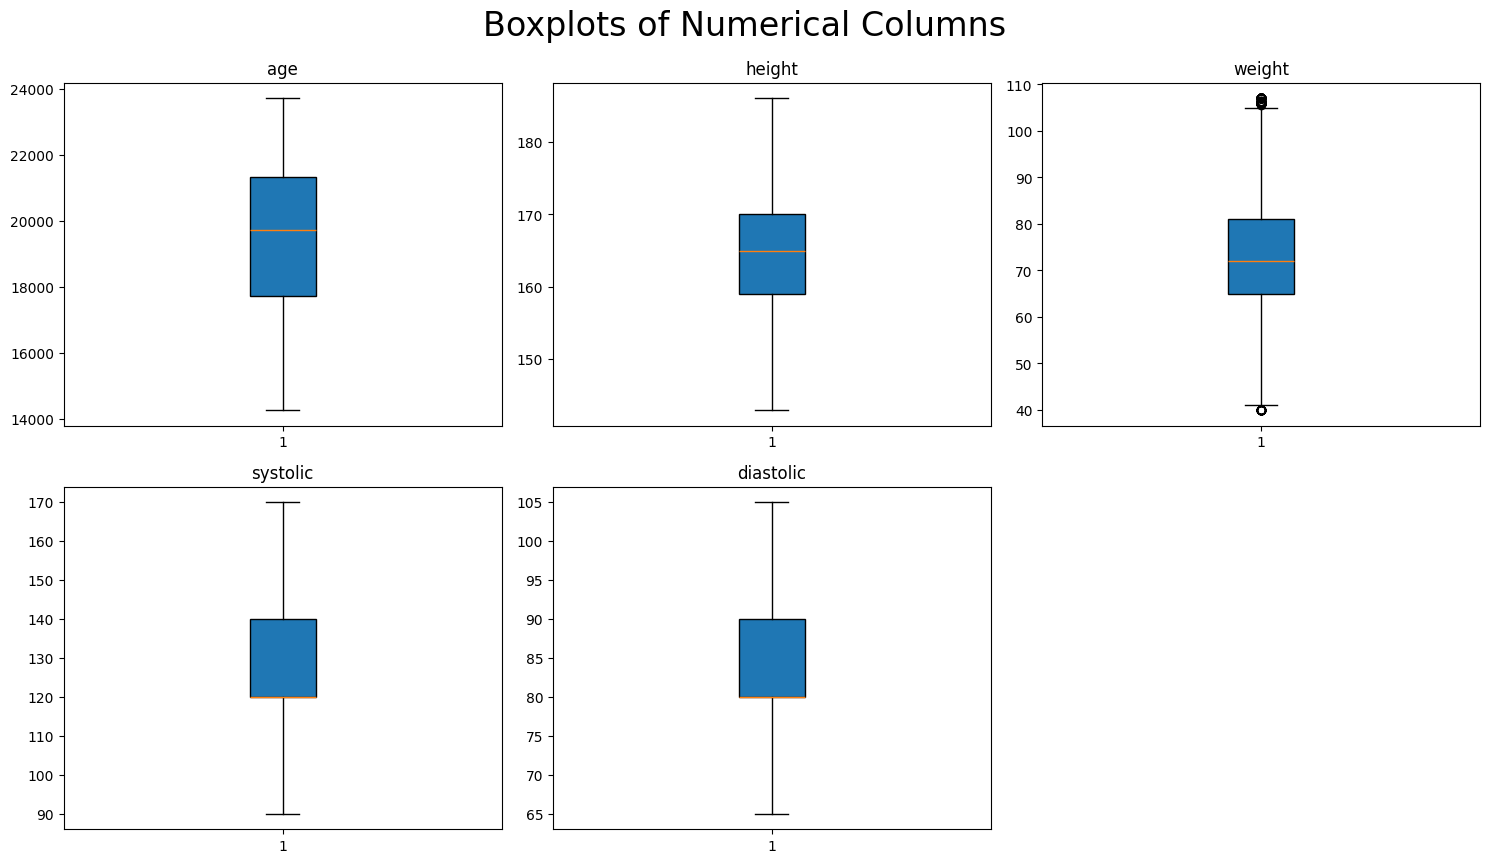

In [363]:
# Pilih kolom-kolom numerik yang ingin ditampilkan dalam boxplot
selected_columns = numcol
dataset3 = df2[selected_columns]

# Plot boxplot
fig = plt.figure(figsize=(15, 25))
plt.suptitle('Boxplots of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(dataset3.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(dataset3.columns.values[i])

    # Plot boxplot
    plt.boxplot(dataset3.iloc[:, i], patch_artist=True)
    plt.tight_layout()

plt.show()

There still an outlier in the weight column, we'll try to filter the outlier again, let's check the percentage

(+ insight ya temen2)

In [364]:
selected_columns = numcol
dataset2 = df2[selected_columns]

# Function
def percentage_of_outliers(data):
    outlier_percentages = {}
    total_samples = len(data)

    for column in data.columns:
        # IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Upper bound & Lower bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Percentage of outlier
        outlier_count = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
        outlier_percentage = (outlier_count / total_samples) * 100
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

# total percentage outlier
outlier_percentages = percentage_of_outliers(dataset2)

# show result
for column, percentage in outlier_percentages.items():
    print(f"Total outlier in {column}: {percentage:.2f}%")

Total outlier in age: 0.00%
Total outlier in height: 0.00%
Total outlier in weight: 0.42%
Total outlier in systolic: 0.00%
Total outlier in diastolic: 0.00%


since it's below 1 % we can ignore it

In [365]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.7 MB


# Feature Engineering

## Age

In [366]:
df2['age'] = round((df['age']/365),0)

## BMI Column

BMI = weight/(height in m)^2

In [367]:
df2['bmi'] = (df['weight']/((df['height']/100)**2))
df2['bmi'] = round(df2['bmi'])

# Data Cleaning 2

In [368]:
#category column
catcol = ['gender','cholesterol','smoke','alco','active','gluc']
#numerical column
numcol = ['age','height','weight','systolic','diastolic','bmi']

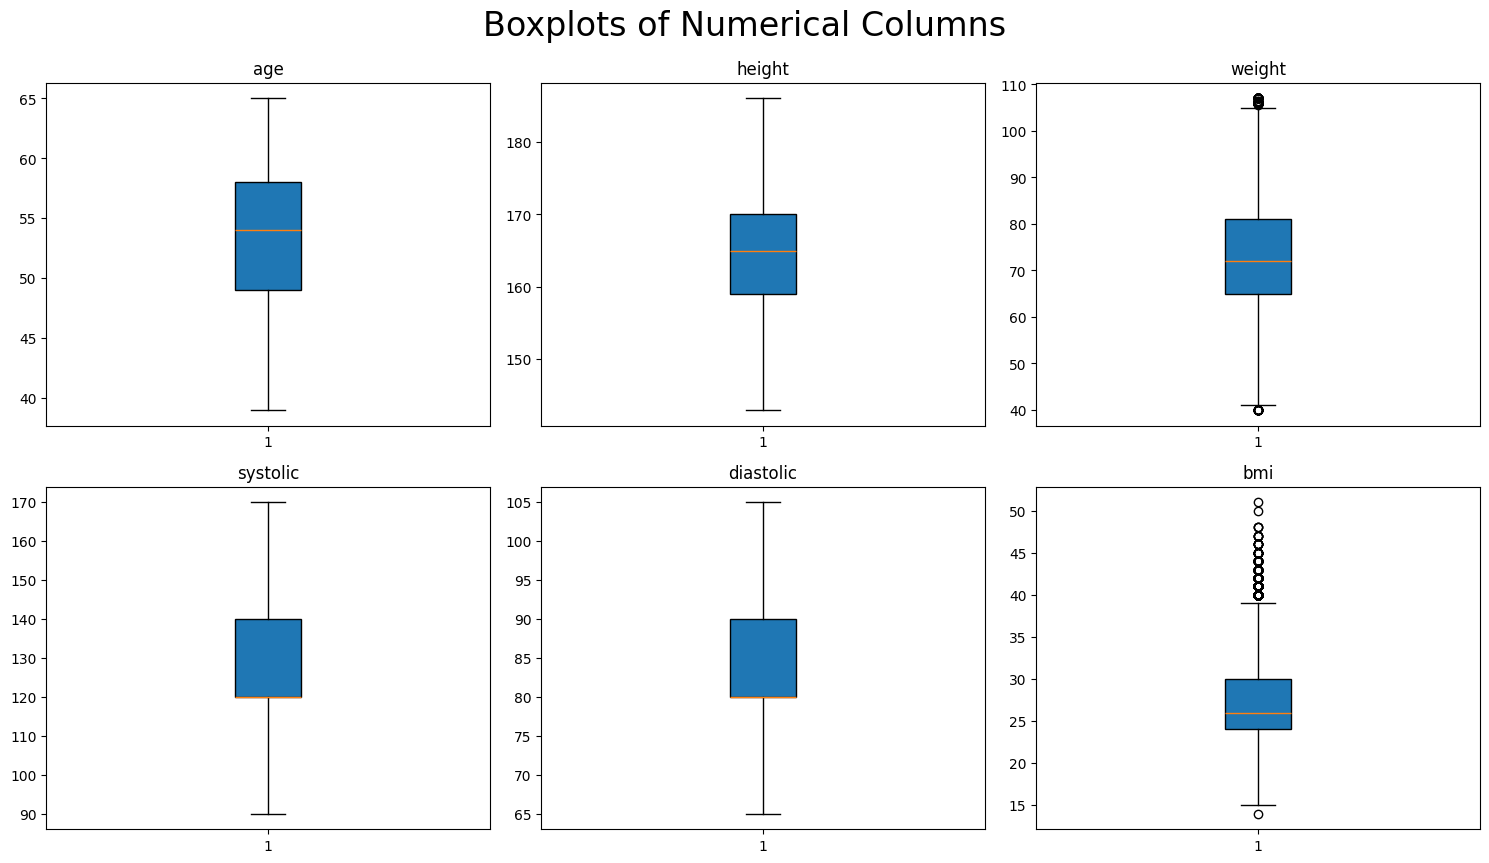

In [369]:
# Pilih kolom-kolom numerik yang ingin ditampilkan dalam boxplot
selected_columns = numcol
dataset3 = df2[selected_columns]

# Plot boxplot
fig = plt.figure(figsize=(15, 25))
plt.suptitle('Boxplots of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(dataset3.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(dataset3.columns.values[i])

    # Plot boxplot
    plt.boxplot(dataset3.iloc[:, i], patch_artist=True)
    plt.tight_layout()

plt.show()

there are still few outliers in bmi and weight let's check the total data

In [370]:
dataset3 = df2[selected_columns]

# Function
def percentage_of_outliers(data):
    outlier_percentages = {}
    total_samples = len(data)

    for column in data.columns:
        # IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Upper bound & Lower bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Percentage of outlier
        outlier_count = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
        outlier_percentage = (outlier_count / total_samples) * 100
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

# total percentage outlier
outlier_percentages = percentage_of_outliers(dataset3)

# show result
for column, percentage in outlier_percentages.items():
    print(f"Total outlier in {column}: {percentage:.2f}%")

Total outlier in age: 0.00%
Total outlier in height: 0.00%
Total outlier in weight: 0.42%
Total outlier in systolic: 0.00%
Total outlier in diastolic: 0.00%
Total outlier in bmi: 1.27%


The outlier is considerably small so we will ignore it

In [371]:
df3 = df2.copy()

# Correlation

##  Prepare Corr Columns

In [372]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
 13  bmi          62502 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 7.2 MB


In [373]:
catcol

['gender', 'cholesterol', 'smoke', 'alco', 'active', 'gluc']

In [374]:
#mvcol = multivariablecolumn
mvcol = list(set(catcol).difference(['cholesterol', 'gluc']))
mvcol

['active', 'gender', 'smoke', 'alco']

In [375]:
catcol = list(set(catcol) - set(mvcol))
catcol

['gluc', 'cholesterol']

In [376]:
# Categorical variable untuk variabel yang category-nya ada 2
df_new = df3.copy()
for i in catcol + ['cardio']:
  df_new[i] = df_new[i].astype('category')
  df_new[i] = df_new[i].cat.codes
  df_new[i] = df_new[i].astype(int)

In [377]:
df_new[pluscol] = df_new[pluscol]+1

In [378]:
df_new[pluscol]

,cholesterol,gluc
0,1,1
1,3,1
2,3,1
3,1,1
5,2,2
...,...,...
69993,1,1
69994,1,1
69995,1,1
69998,1,2


In [379]:
corr_column = df_new.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['id']))
corr_column

['gluc',
 'smoke',
 'cardio',
 'diastolic',
 'systolic',
 'alco',
 'height',
 'weight',
 'bmi',
 'active',
 'gender',
 'cholesterol',
 'age']

In [380]:
len(corr_column)

13

In [381]:
df_new[corr_column]

,gluc,smoke,cardio,diastolic,systolic,alco,height,weight,bmi,active,gender,cholesterol,age
0,1,0,0,80.0,110.0,0,168.0,62.0,22.0,1,1,1,50.0
1,1,0,1,90.0,140.0,0,156.0,85.0,35.0,1,0,3,55.0
2,1,0,1,70.0,130.0,0,165.0,64.0,24.0,0,0,3,52.0
3,1,0,1,100.0,150.0,0,169.0,82.0,29.0,1,1,1,48.0
5,2,0,0,80.0,120.0,0,151.0,67.0,29.0,0,0,2,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,0,1,90.0,130.0,0,172.0,70.0,24.0,1,0,1,54.0
69994,1,0,1,80.0,150.0,0,165.0,80.0,29.0,1,0,1,58.0
69995,1,1,0,80.0,120.0,0,168.0,76.0,27.0,1,1,1,53.0
69998,2,0,1,80.0,135.0,0,163.0,72.0,27.0,0,0,1,61.0


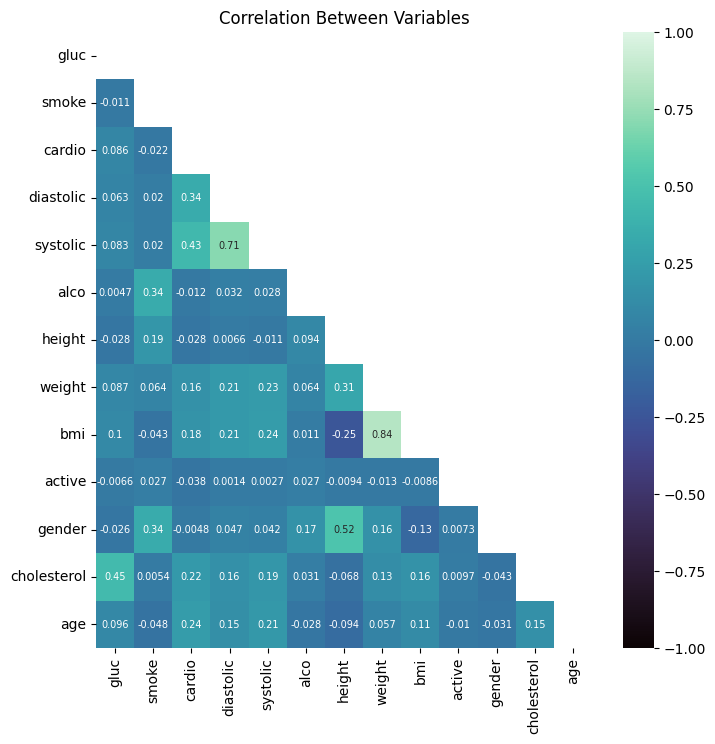

In [382]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables')

# Supaya matriks korelasi yang terlihat cuman bagian bawahnya
mask = np.triu(np.ones_like(df_new[corr_column].corr(), dtype=bool))

sns.heatmap(df_new[corr_column].corr(), vmin=-1,
            vmax=1, cmap='mako', annot=True, mask=mask,
            annot_kws={"fontsize": 7})

plt.show()

it's shown that bmi and weight, are highly correlated, also systolic and diastolic blood pressure. glucose level indirectly correlated to cardiovascular disease chance since it's correlated wih cholesterol

In [383]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,NaN,0.003298,0.002746,0.002845,0.001459,0.003953,0.001324,0.005114,0.000438,0.002465,0.000165,0.004603,0.004222,0.000377
age,NaN,NaN,0.031033,0.094203,0.057430,0.205199,0.148222,0.154461,0.096386,0.047872,0.028327,0.010220,0.236082,0.111612
gender,NaN,NaN,NaN,0.517276,0.157696,0.042239,0.047299,0.043390,0.025926,0.337061,0.168993,0.007320,0.004814,0.131941
height,NaN,NaN,NaN,NaN,0.305802,0.010803,0.006614,0.068191,0.028393,0.192065,0.094084,0.009358,0.027595,0.245602
weight,NaN,NaN,NaN,NaN,NaN,0.233134,0.214544,0.125385,0.086768,0.063814,0.063659,0.013115,0.161721,0.841861
systolic,NaN,NaN,NaN,NaN,NaN,NaN,0.705629,0.192533,0.082808,0.019992,0.027612,0.002741,0.432215,0.241574
diastolic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155793,0.063126,0.020189,0.031674,0.001399,0.336278,0.212750
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450073,0.005433,0.030847,0.009690,0.218223,0.164549
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010522,0.004749,0.006625,0.085730,0.103522
smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341810,0.027300,0.022171,0.043083


In [384]:
# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['diastolic', 'bmi']

based on correlation analysis diastolic and bmi could be dropped but in this case we still need diastolic data so we'll only drop bmi data

In [385]:
to_keep = list(set(corr_column) - set(['bmi']) - set(['cardio']))
to_keep

['gluc',
 'diastolic',
 'systolic',
 'alco',
 'height',
 'weight',
 'active',
 'gender',
 'smoke',
 'cholesterol',
 'age']

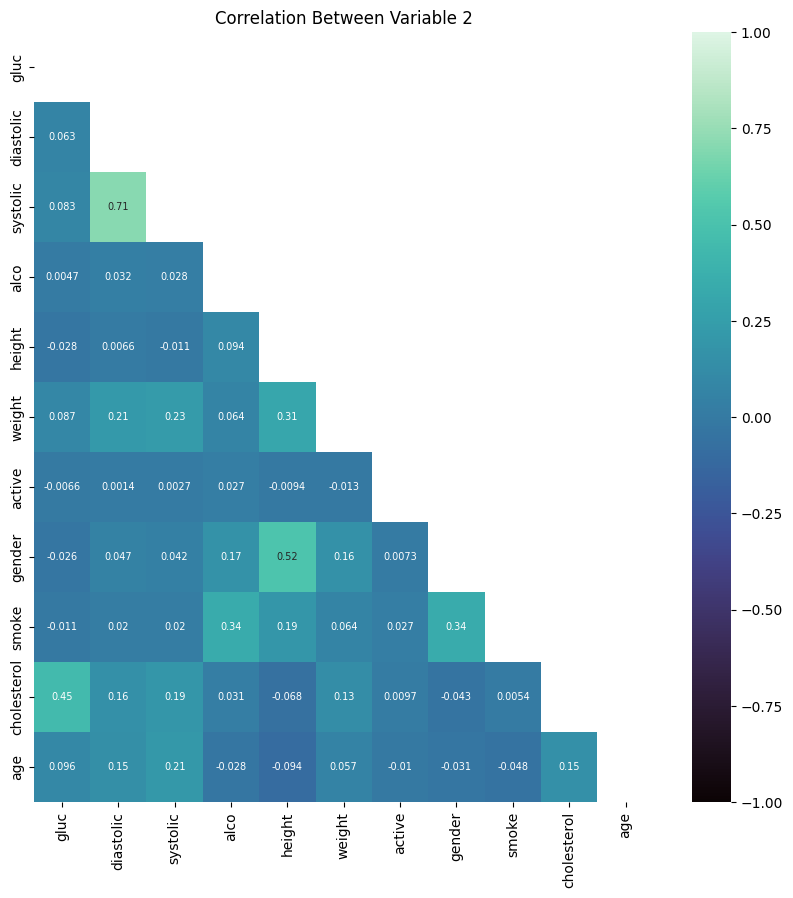

In [386]:
corr_column_new = to_keep

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    df_new[corr_column_new].corr(), dtype=bool))
sns.heatmap(df_new[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7})

plt.show()

# Modeling

## Feature Scaling

In [387]:
mvcol

['active', 'gender', 'smoke', 'alco']

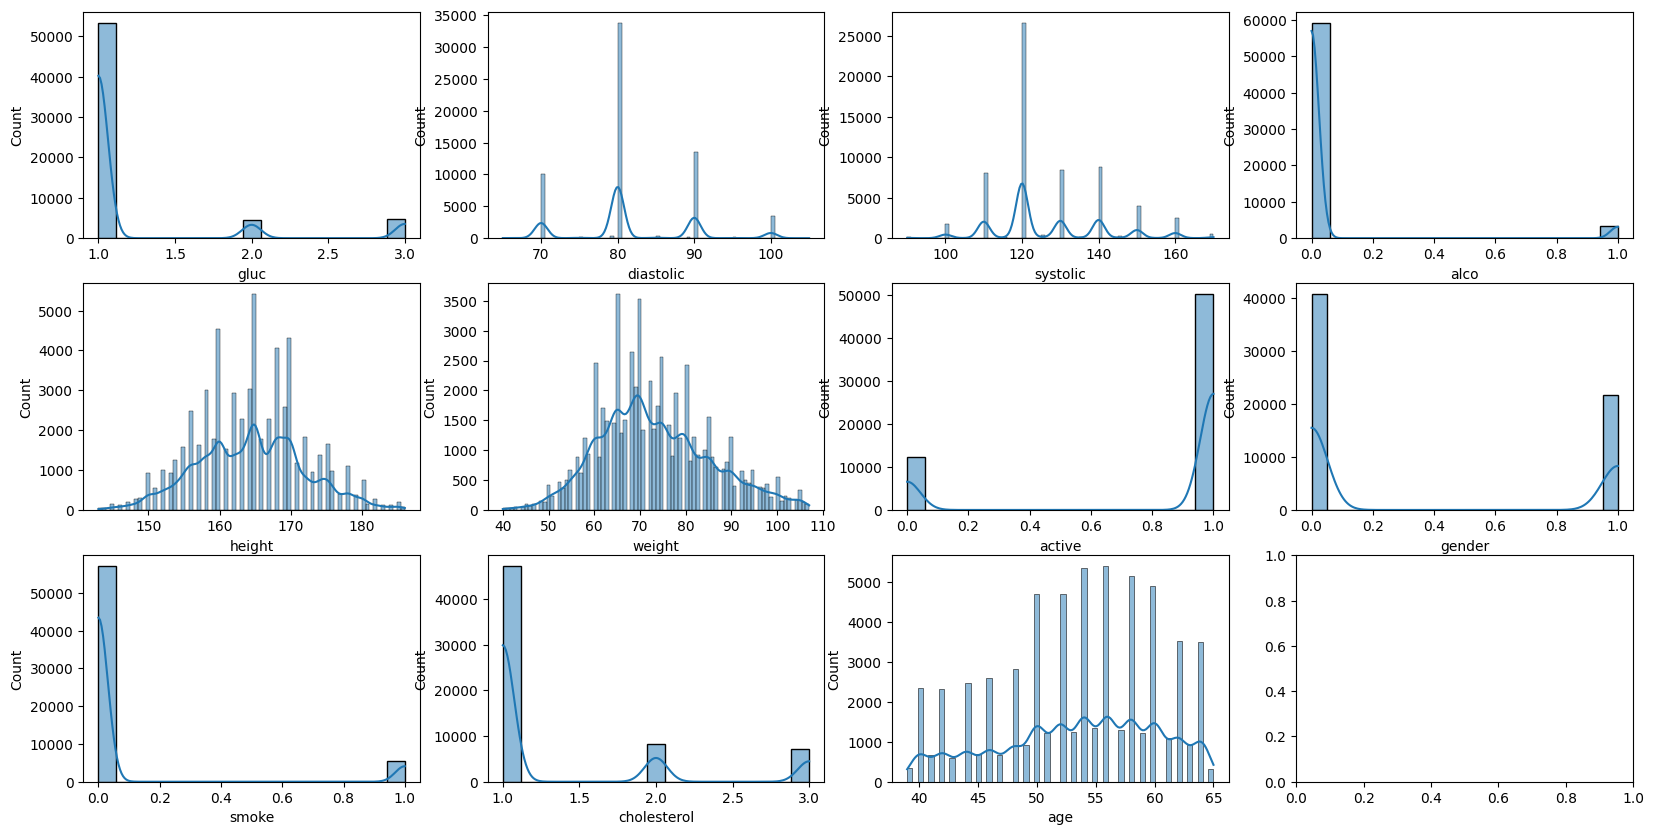

In [388]:
fig, ax =plt.subplots(3,4, figsize=(20,10))

for i, column in enumerate(df_new[corr_column_new]):
    sns.histplot(df_new, x=column, ax=ax[i//4,i%4], kde=True)

plt.show()

### Scaler

In [389]:
scaler = StandardScaler()

In [390]:
to_scale = list(set(corr_column_new)-set(catcol)-set(mvcol))
to_scale

['diastolic', 'systolic', 'height', 'weight', 'age']

In [391]:
scaler.fit(df_new[to_scale] )

StandardScaler()

In [392]:
df_new[to_scale] = scaler.transform(df_new[to_scale])

## Train Test Split

In [393]:
# Define the whole data
X = df_new[corr_column_new]
y = df_new['cardio']  # Extracting the 'cardio' column as a Series, not a DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

y_train = y_train.ravel()

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (43751, 11)
Number transactions y_train dataset:  (43751,)
Number transactions X_test dataset:  (18751, 11)
Number transactions y_test dataset:  (18751,)


C:\Users\Timothy\AppData\Local\Temp\ipykernel_9996\1568844918.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


In [394]:
print('Raw Data Target Percentage')
print('cardio : {}'.format(y.value_counts()[1]/y.value_counts().sum()*100))
print('Not cardio : {}'.format(y.value_counts()[0]/y.value_counts().sum()*100))

Raw Data Target Percentage
cardio : 49.39041950657579
Not cardio : 50.60958049342421


## Train Model

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression()))

# Other models
models.append(('Random Forest', RandomForestClassifier()))

models.append(('DecisionTree', DecisionTreeClassifier()))

models.append(('KNearestNeighbor', KNeighborsClassifier()))

models.append(('XGBoost', XGBClassifier()))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection

i=0
#Evaluate model dengan K-Fold Cross Validation
for name, model in models:
  kfold = model_selection.KFold(n_splits=10) #10 Fold Cross Validation
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)]
  i+=1
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


### Visualize Model Score

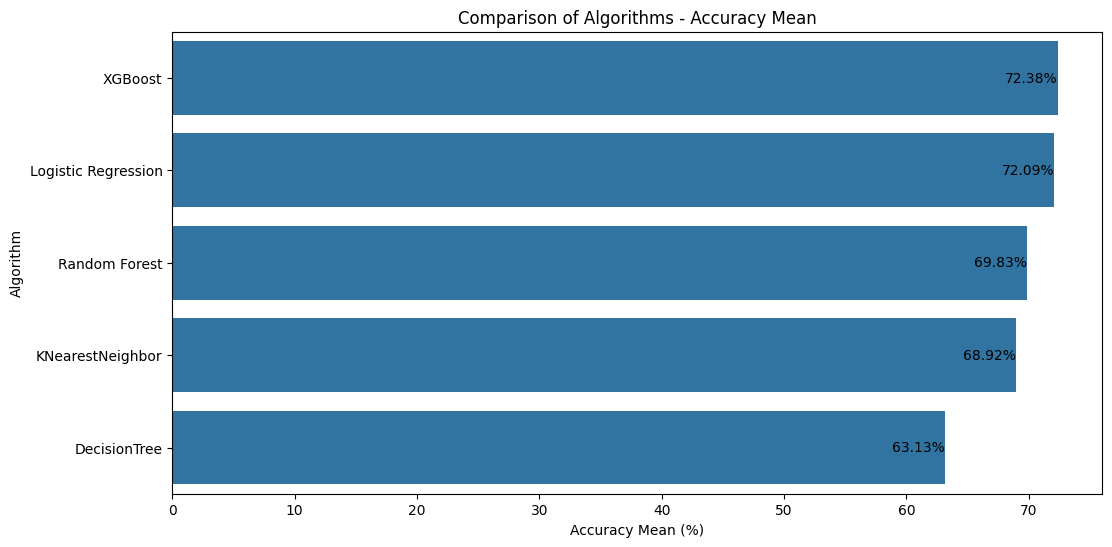

In [ ]:
# Visulize Accuracy Mean
plt.figure(figsize=(12, 6))
accuracy_plot = sn.barplot(x='Accuracy Mean', y='Algorithm', data=model_results.sort_values(by='Accuracy Mean', ascending=False))
plt.title('Comparison of Algorithms - Accuracy Mean')
plt.xlabel('Accuracy Mean (%)')
plt.ylabel('Algorithm')

# Bar annotation
for index, value in enumerate(model_results['Accuracy Mean'].sort_values(ascending=False)):
    accuracy_plot.text(value, index, f'{value:.2f}%', color='black', ha="right", va="center")

plt.show()

### Evaluate Model with ROC Curve

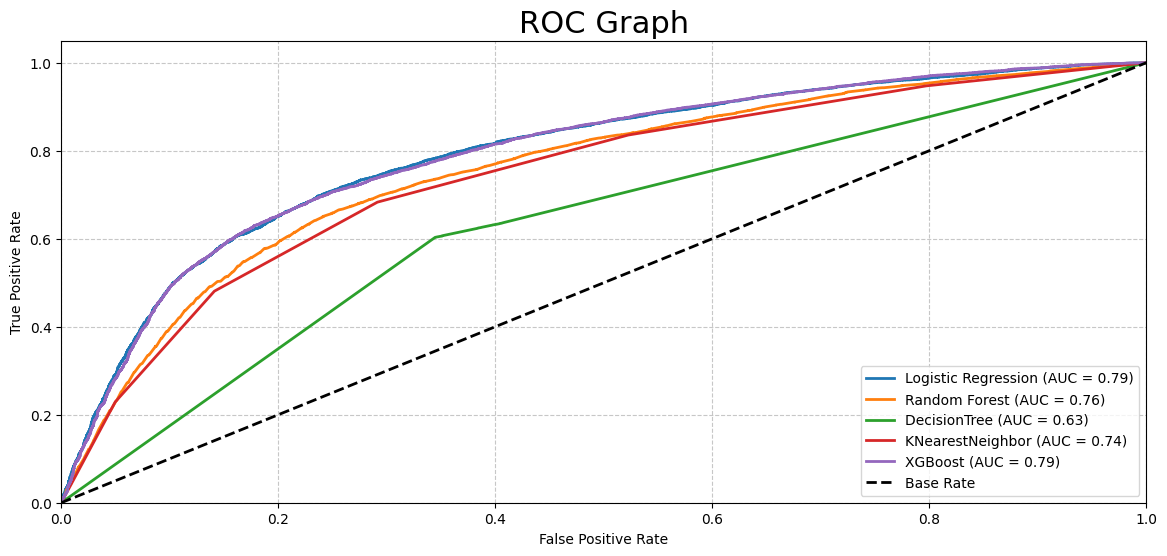

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNearestNeighbor': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

plt.figure(figsize=(14, 6))

for model_name, model in models.items():
    # Fit model on the Training dataset
    model.fit(X_train, y_train)

    # Predict the Test set results
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate AUC
    auc_score = auc(fpr, tpr)

    # Plot ROC curve with different colors
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', linewidth=2)

# Plot Base Rate ROC
plt.plot([0, 1], [0, 1], 'k--', label='Base Rate', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Graph', fontsize=22)
plt.legend(loc="lower right", fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

we can try search for best parameter for XGBoost and Logistic Regression using GridSearchCV

### Parameter Searching

In [ ]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params, grid_search

# Logistic Regression parameters and grid search
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

lr_model = LogisticRegression()
best_params_lr, grid_search_lr = perform_grid_search(lr_model, lr_param_grid, X_train, y_train)
print("Best Parameters for Logistic Regression: ", best_params_lr)

# XGBoost parameters and grid search
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 75, 100],
    'max_depth': [3, 5, 10]
}

xgb_model = XGBClassifier()
best_params_xgb, grid_search_xgb = perform_grid_search(xgb_model, xgb_param_grid, X_train, y_train)
print("Best Parameters for XGBoost: ", best_params_xgb)

# Random Forest parameters and grid search
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

rf_model = RandomForestClassifier()
best_params_rf, grid_search_rf = perform_grid_search(rf_model, rf_param_grid, X_train, y_train)
print("Best Parameters for Random Forest: ", best_params_rf)

# Decision Tree parameters and grid search
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4],
}

dt_model = DecisionTreeClassifier()
best_params_dt, grid_search_dt = perform_grid_search(dt_model, dt_param_grid, X_train, y_train)
print("Best Parameters for Decision Tree: ", best_params_dt)

# K-Nearest Neighbors parameters and grid search
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
best_params_knn, grid_search_knn = perform_grid_search(knn_model, knn_param_grid, X_train, y_train)
print("Best Parameters for K-Nearest Neighbors: ", best_params_knn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Logistic Regression:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for K-Nearest Neighbors:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


## Test the parameter

In [ ]:
# Initialize models
models = []

models.append(('Logistic RegressionHP', LogisticRegression(**best_params_lr)))
models.append(('XGBoostClassifierHP', XGBClassifier(**best_params_xgb)))
models.append(('DecisionTreeHP', DecisionTreeClassifier(**best_params_dt)))
models.append(('RandomForestHP', RandomForestClassifier(**best_params_rf)))
models.append(('KNeighborsHP', KNeighborsClassifier(**best_params_knn)))

# Initialize result storage
acc_results = []
auc_results = []
names = []

# Column names for the results DataFrame
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results1 = pd.DataFrame(columns=col)

# Evaluate models using K-Fold Cross Validation
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)  # 10-fold Cross Validation

    # Cross-validation for accuracy
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # Cross-validation for ROC AUC
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    # Store results
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)

    # Fill in the results DataFrame
    model_results1.loc[i] = [name, round(cv_auc_results.mean() * 100, 2),
                            round(cv_auc_results.std() * 100, 2),
                            round(cv_acc_results.mean() * 100, 2),
                            round(cv_acc_results.std() * 100, 2)]
    i += 1

# Display the results DataFrame sorted by ROC AUC mean in descending order
model_results1.sort_values(by=['ROC AUC Mean'], ascending=False, inplace=True)
model_results1

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,XGBoostClassifierHP,79.38,0.49,72.76,0.63
3,RandomForestHP,79.34,0.52,72.80,0.69
0,Logistic RegressionHP,78.44,0.53,72.14,0.63
2,DecisionTreeHP,77.45,0.58,71.82,0.55
4,KNeighborsHP,75.04,0.68,69.96,0.72


## Before & After

### Before

In [ ]:
# Initialize models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('XGBoostClassifier', XGBClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('KNeighbors', KNeighborsClassifier())
]

# Create an empty list to store results
results_list = []

# Evaluate and store results for each model
for model_name, model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = round(accuracy_score(y_test, y_pred), 2) * 100
    precision = round(precision_score(y_test, y_pred), 2) * 100
    recall = round(recall_score(y_test, y_pred), 2) * 100
    f1 = round(f1_score(y_test, y_pred), 2) * 100

    # Calculate ROC AUC
    roc_auc = round(roc_auc_score(y_test, y_pred), 2) * 100

    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

# Create DataFrame from the list of results
results = pd.DataFrame(results_list)

# Display the results
results


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,73.0,75.0,66.0,71.0,73.0
1,XGBoostClassifier,73.0,74.0,68.0,71.0,73.0
2,DecisionTree,63.0,63.0,61.0,62.0,63.0
3,RandomForest,70.0,70.0,69.0,69.0,70.0
4,KNeighbors,70.0,69.0,68.0,69.0,70.0


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,73.0,75.0,66.0,71.0,73.0
1,XGBoostClassifier,73.0,74.0,68.0,71.0,73.0
2,DecisionTree,63.0,63.0,61.0,62.0,63.0
3,RandomForest,70.0,70.0,69.0,69.0,70.0
4,KNeighbors,70.0,69.0,68.0,69.0,70.0


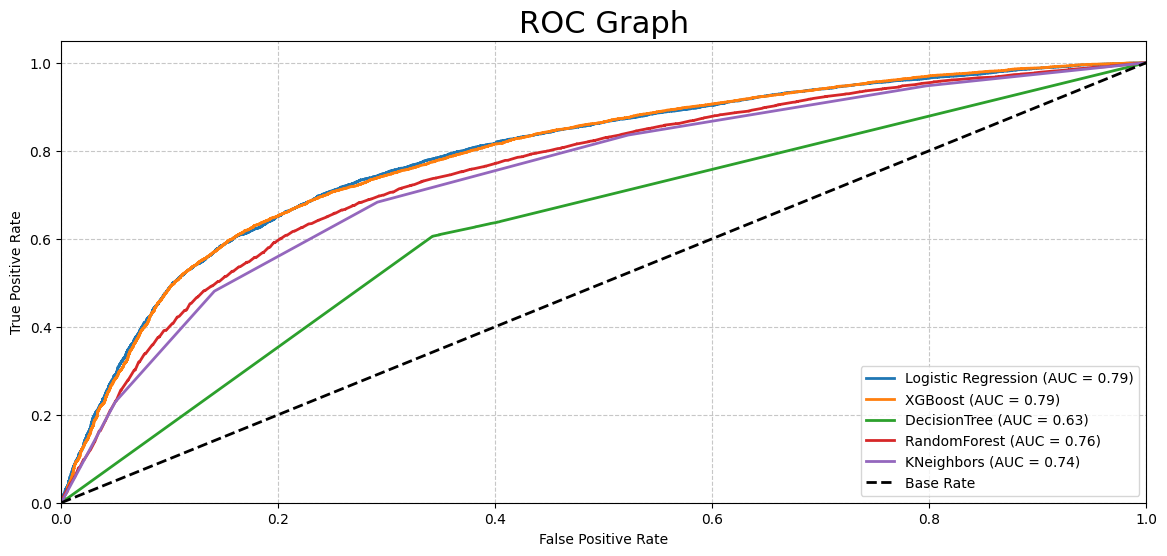

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier()
}

plt.figure(figsize=(14, 6))

for model_name, model in models.items():
    # Fit the model on the training dataset
    model.fit(X_train, y_train)

    # Predict the test set results
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC score
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve with different colors
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', linewidth=2)

# Plot the Base Rate ROC
plt.plot([0, 1], [0, 1], 'k--', label='Base Rate', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Graph', fontsize=22)
plt.legend(loc="lower right", fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()


### After

In [ ]:
# Initialize models
models = []

models.append(('Logistic RegressionHP', LogisticRegression(**best_params_lr)))
models.append(('XGBoostClassifierHP', XGBClassifier(**best_params_xgb)))
models.append(('DecisionTreeHP', DecisionTreeClassifier(**best_params_dt)))
models.append(('RandomForestHP', RandomForestClassifier(**best_params_rf)))
models.append(('KNeighborsHP', KNeighborsClassifier(**best_params_knn)))

# Initialize storage for results
results_list1 = []

# Evaluate and store results for each model
for model_name, model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = round(accuracy_score(y_test, y_pred), 2) * 100
    precision = round(precision_score(y_test, y_pred), 2) * 100
    recall = round(recall_score(y_test, y_pred), 2) * 100
    f1 = round(f1_score(y_test, y_pred), 2) * 100

    # Calculate ROC AUC
    roc_auc = round(roc_auc_score(y_test, y_pred), 2) * 100

    # Append results to the list
    results_list1.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

# Create DataFrame from the list of results
results1 = pd.DataFrame(results_list1)

# Display the results
results1


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic RegressionHP,73.0,75.0,67.0,71.0,73.0
1,XGBoostClassifierHP,73.0,75.0,69.0,72.0,73.0
2,DecisionTreeHP,72.0,72.0,71.0,71.0,72.0
3,RandomForestHP,73.0,75.0,68.0,71.0,73.0
4,KNeighborsHP,71.0,71.0,69.0,70.0,70.0


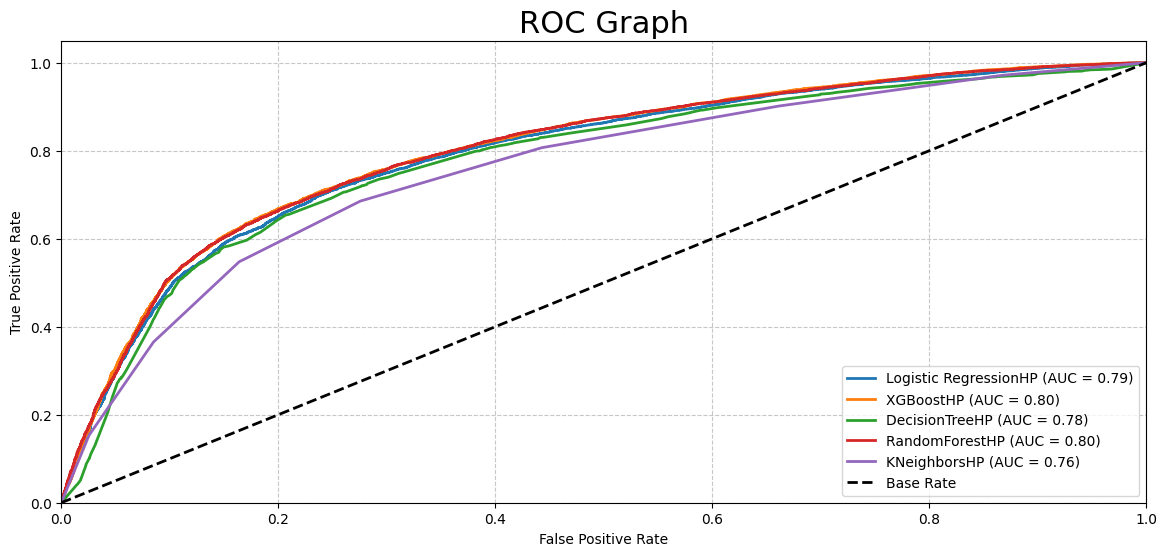

In [ ]:
models = {
    'Logistic RegressionHP': LogisticRegression(**best_params_lr),
    'XGBoostHP': XGBClassifier(**best_params_xgb),
    'DecisionTreeHP': DecisionTreeClassifier(**best_params_dt),
    'RandomForestHP': RandomForestClassifier(**best_params_rf),
    'KNeighborsHP': KNeighborsClassifier(**best_params_knn)
}

plt.figure(figsize=(14, 6))

for model_name, model in models.items():
    # Fit the model on the training dataset
    model.fit(X_train, y_train)

    # Predict the test set results
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC score
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve with different colors
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', linewidth=2)

# Plot the Base Rate ROC
plt.plot([0, 1], [0, 1], 'k--', label='Base Rate', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Graph', fontsize=22)
plt.legend(loc="lower right", fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


### Before & After

In [ ]:
eval = pd.concat([results,results1],ignore_index=True)
eval.sort_values(by=['Recall'],ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
7,DecisionTreeHP,72.0,72.0,71.0,71.0,72.0
3,RandomForest,70.0,70.0,69.0,69.0,70.0
6,XGBoostClassifierHP,73.0,75.0,69.0,72.0,73.0
9,KNeighborsHP,71.0,71.0,69.0,70.0,70.0
1,XGBoostClassifier,73.0,74.0,68.0,71.0,73.0
4,KNeighbors,70.0,69.0,68.0,69.0,70.0
8,RandomForestHP,73.0,75.0,68.0,71.0,73.0
5,Logistic RegressionHP,73.0,75.0,67.0,71.0,73.0
0,Logistic Regression,73.0,75.0,66.0,71.0,73.0
2,DecisionTree,63.0,63.0,61.0,62.0,63.0


#### Visualize the result

#### Visualize the result

##### Accuracy

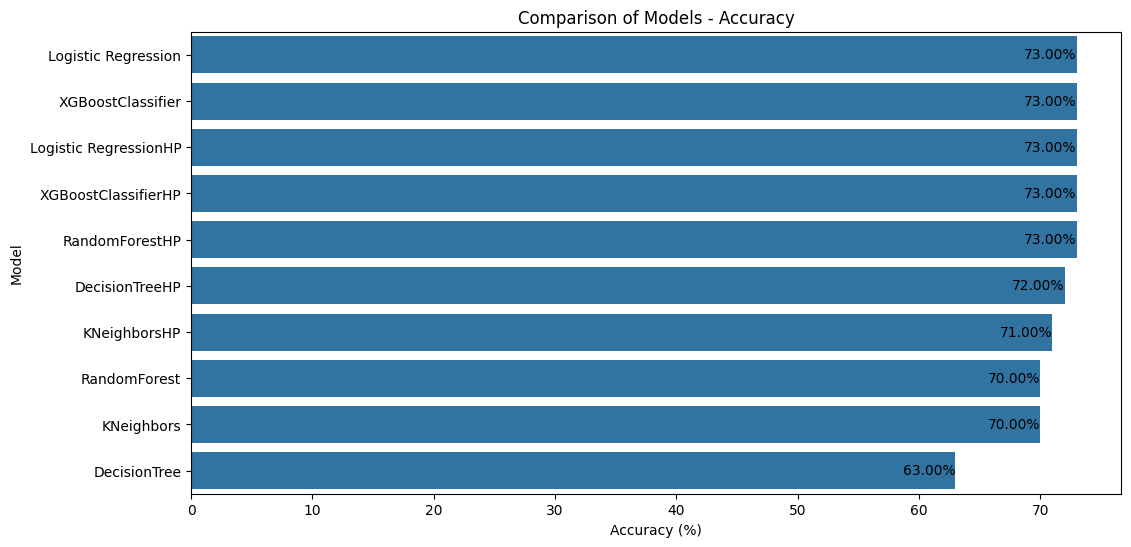

In [ ]:
# Accuracy
plt.figure(figsize=(12, 6))
Accuracy_plot = sn.barplot(x='Accuracy', y='Model', data=eval.sort_values(by='Accuracy', ascending=False))
plt.title('Comparison of Models - Accuracy')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')

# Anotation
for index, value in enumerate(eval['Accuracy'].sort_values(ascending=False)):
    Accuracy_plot.text(value, index, f'{value:.2f}%', color='black', ha="right", va="center")

plt.show()

##### Recall

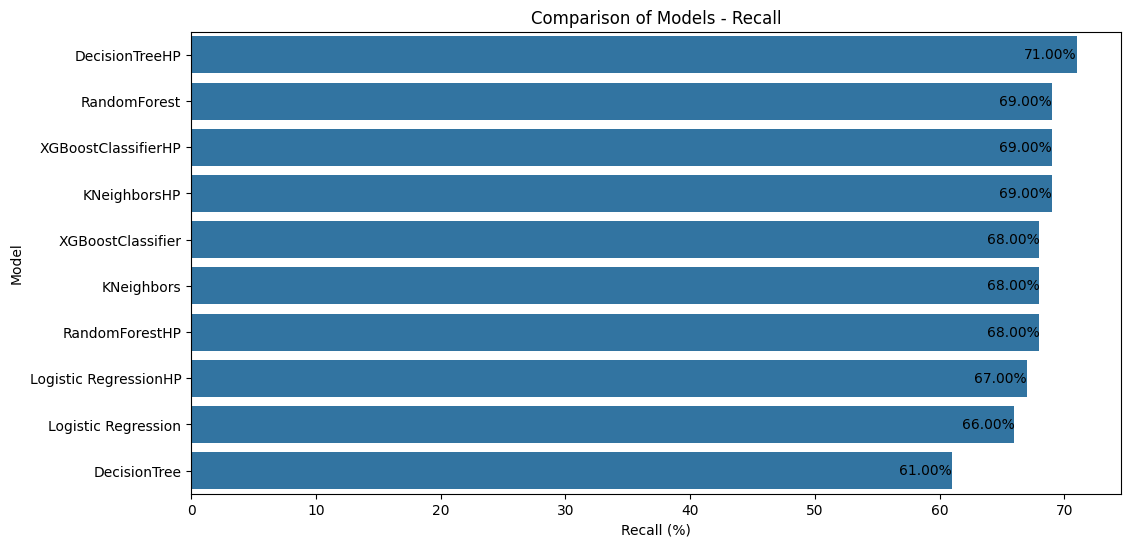

In [ ]:
# Recall
plt.figure(figsize=(12, 6))
Recall_plot = sn.barplot(x='Recall', y='Model', data=eval.sort_values(by='Recall', ascending=False))
plt.title('Comparison of Models - Recall')
plt.xlabel('Recall (%)')
plt.ylabel('Model')

# Recall
for index, value in enumerate(eval['Recall'].sort_values(ascending=False)):
    Recall_plot.text(value, index, f'{value:.2f}%', color='black', ha="right", va="center")

plt.show()

after tuning the parameter **DecisionTree** have the best overall performance, in this case we'll consider recall score and F1-Score because it's health-related problem

# Classification Report

In [ ]:
model_lr = LogisticRegression(**best_params_lr)
model_xgb = XGBClassifier(**best_params_xgb)
model_dt = DecisionTreeClassifier(**best_params_dt)
model_rf = RandomForestClassifier(**best_params_rf)
model_knn = KNeighborsClassifier(**best_params_knn)

In [ ]:
model_lr.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

# Classification Report LR

### Confusion Matrix train

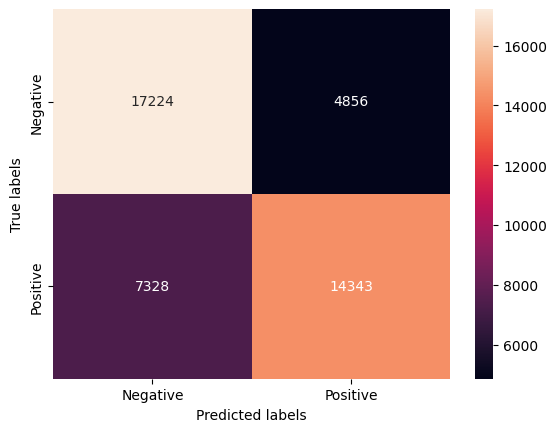

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_train, model_lr.predict(X_train))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_lr.predict(X_train), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.70      0.78      0.74     22080
    Positive       0.75      0.66      0.70     21671

    accuracy                           0.72     43751
   macro avg       0.72      0.72      0.72     43751
weighted avg       0.72      0.72      0.72     43751



### Confusion Matrix test

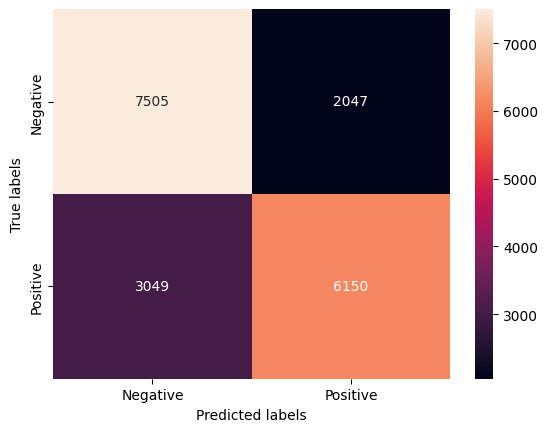

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_lr.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_lr.predict(X_test), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.71      0.79      0.75      9552
    Positive       0.75      0.67      0.71      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.73      0.73     18751
weighted avg       0.73      0.73      0.73     18751



## Classification Report XGB

### Confusion Matrix train

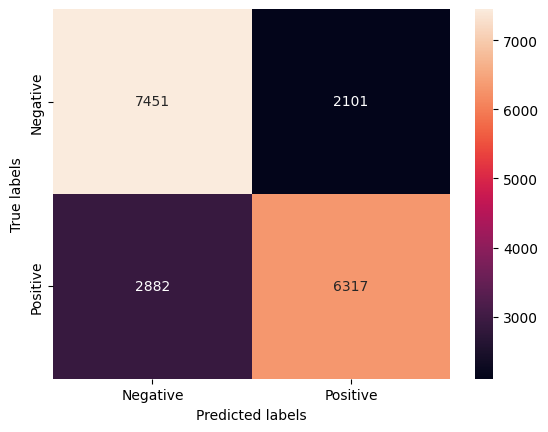

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_xgb.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_xgb.predict(X_train), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75     22080
    Positive       0.76      0.69      0.72     21671

    accuracy                           0.74     43751
   macro avg       0.74      0.74      0.74     43751
weighted avg       0.74      0.74      0.74     43751



### Confusion Matrix test

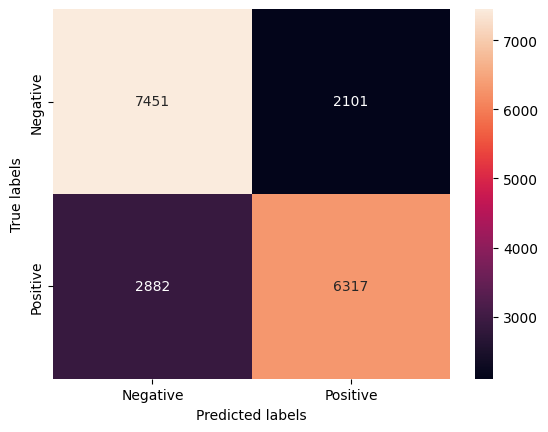

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_xgb.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_xgb.predict(X_test), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.72      0.78      0.75      9552
    Positive       0.75      0.69      0.72      9199

    accuracy                           0.73     18751
   macro avg       0.74      0.73      0.73     18751
weighted avg       0.74      0.73      0.73     18751



## Classification Report DT

### Confusion Matrix train

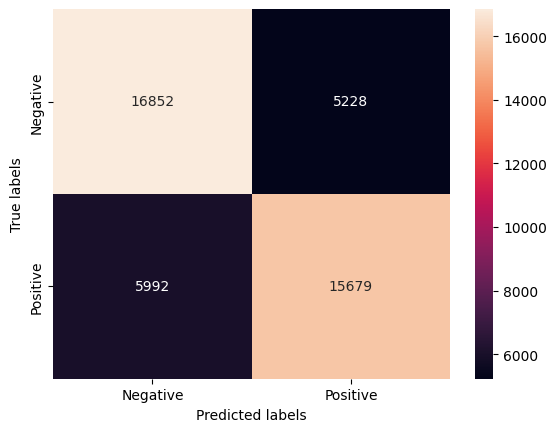

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_train, model_dt.predict(X_train))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_dt.predict(X_train), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.74      0.76      0.75     22080
    Positive       0.75      0.72      0.74     21671

    accuracy                           0.74     43751
   macro avg       0.74      0.74      0.74     43751
weighted avg       0.74      0.74      0.74     43751



### Confusion Matrix test

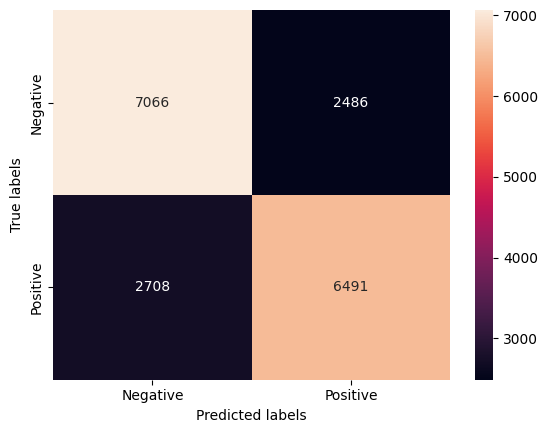

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_dt.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_dt.predict(X_test), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.72      0.74      0.73      9552
    Positive       0.72      0.71      0.71      9199

    accuracy                           0.72     18751
   macro avg       0.72      0.72      0.72     18751
weighted avg       0.72      0.72      0.72     18751



## Classification Report RF

### Confusion Matrix train

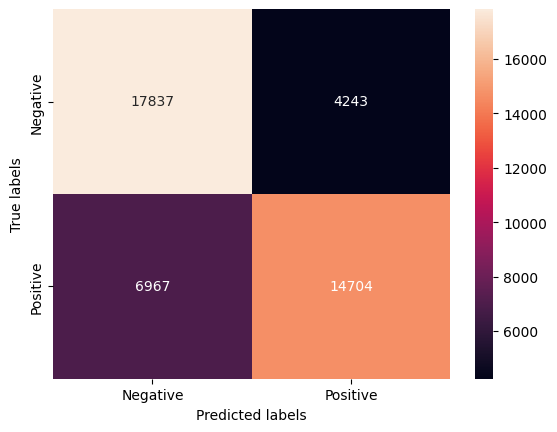

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_train, model_rf.predict(X_train))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_rf.predict(X_train), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.72      0.81      0.76     22080
    Positive       0.78      0.68      0.72     21671

    accuracy                           0.74     43751
   macro avg       0.75      0.74      0.74     43751
weighted avg       0.75      0.74      0.74     43751



### Confusion Matrix test

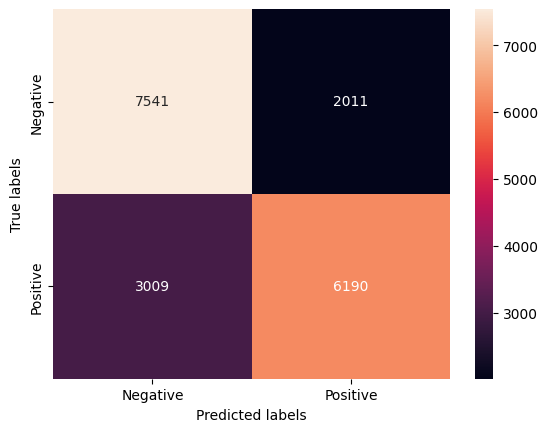

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_rf.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_rf.predict(X_test), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.71      0.79      0.75      9552
    Positive       0.75      0.67      0.71      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.73      0.73     18751
weighted avg       0.73      0.73      0.73     18751



## Classification Report KNN

### Confusion Matrix train

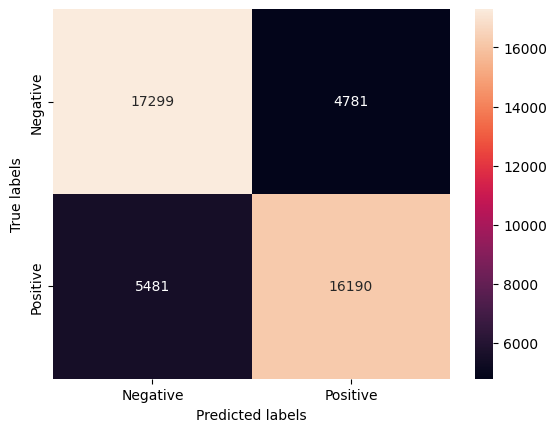

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_train, model_knn.predict(X_train))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_knn.predict(X_train), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77     22080
    Positive       0.77      0.75      0.76     21671

    accuracy                           0.77     43751
   macro avg       0.77      0.77      0.77     43751
weighted avg       0.77      0.77      0.77     43751



### Confusion Matrix test

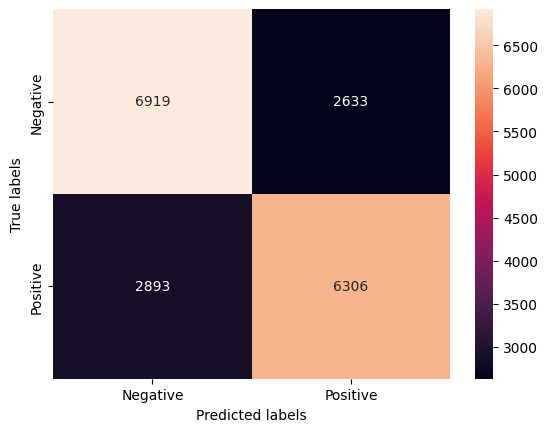

In [ ]:
ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, model_knn.predict(X_test))

# Define custom labels
labels = ['Negative', 'Positive']

# Plot the heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_knn.predict(X_test), target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      9552
    Positive       0.71      0.69      0.70      9199

    accuracy                           0.71     18751
   macro avg       0.71      0.70      0.70     18751
weighted avg       0.71      0.71      0.71     18751



## Select Model

In [ ]:
model_lr.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [ ]:
#evaluated using kfold method
eval = pd.concat([results,results1],ignore_index=True)
eval.sort_values(by=['Recall','F1-Score'],ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
7,DecisionTreeHP,72.0,72.0,71.0,71.0,72.0
6,XGBoostClassifierHP,73.0,75.0,69.0,72.0,73.0
9,KNeighborsHP,71.0,71.0,69.0,70.0,70.0
3,RandomForest,70.0,70.0,69.0,69.0,70.0
1,XGBoostClassifier,73.0,74.0,68.0,71.0,73.0
8,RandomForestHP,73.0,75.0,68.0,71.0,73.0
4,KNeighbors,70.0,69.0,68.0,69.0,70.0
5,Logistic RegressionHP,73.0,75.0,67.0,71.0,73.0
0,Logistic Regression,73.0,75.0,66.0,71.0,73.0
2,DecisionTree,63.0,63.0,61.0,62.0,63.0


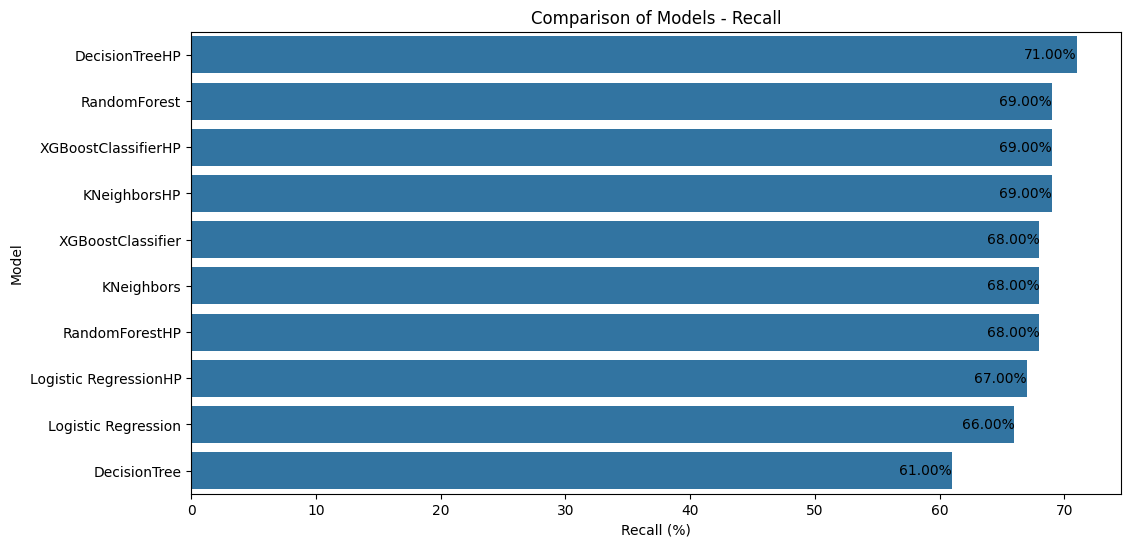

In [ ]:
# Recall
plt.figure(figsize=(12, 6))
Recall_plot = sn.barplot(x='Recall', y='Model', data=eval.sort_values(by='Recall', ascending=False))
plt.title('Comparison of Models - Recall')
plt.xlabel('Recall (%)')
plt.ylabel('Model')

# Recall
for index, value in enumerate(eval['Recall'].sort_values(ascending=False)):
    Recall_plot.text(value, index, f'{value:.2f}%', color='black', ha="right", va="center")

plt.show()

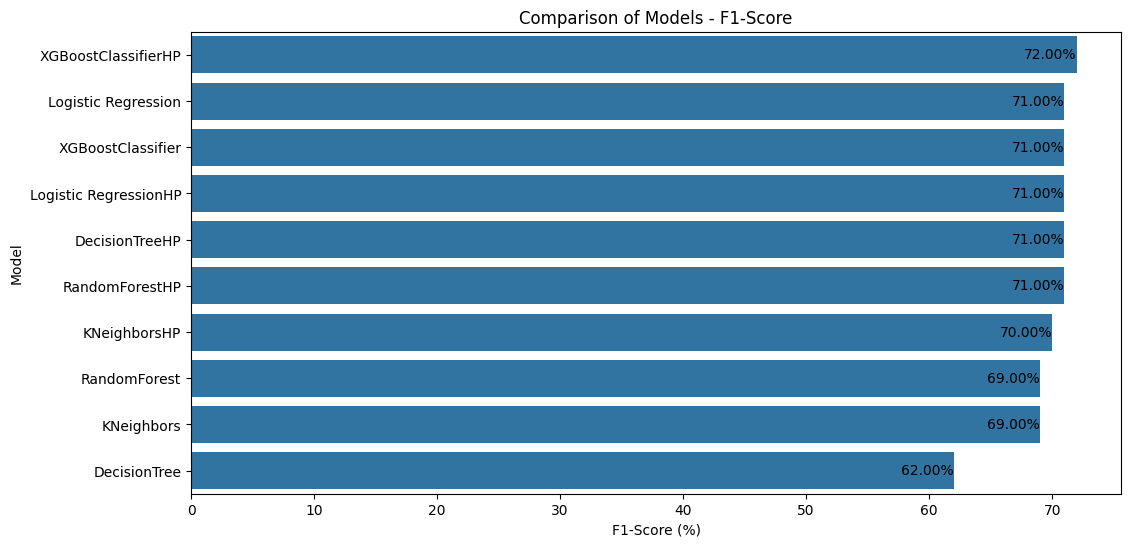

In [ ]:
# F1-Score
plt.figure(figsize=(12, 6))
F1_Score_plot = sn.barplot(x='F1-Score', y='Model', data=eval.sort_values(by='F1-Score', ascending=False))
plt.title('Comparison of Models - F1-Score')
plt.xlabel('F1-Score (%)')
plt.ylabel('Model')

# F1-Score
for index, value in enumerate(eval['F1-Score'].sort_values(ascending=False)):
    F1_Score_plot.text(value, index, f'{value:.2f}%', color='black', ha="right", va="center")

plt.show()

It's Shown that Hyper Parameter-tuned Decision Model has the best model performance so we'll using it for our model

In [ ]:
print(f"train Model LR Score: {model_lr.score(X_train,y_train):.4f}")
print(f"test Model LR Score: {model_lr.score(X_test,y_test):.4f}")
print(f"train Model XGB Score: {model_xgb.score(X_train,y_train):.4f}")
print(f"test Model XGB Score: {model_xgb.score(X_test,y_test):.4f}")
print(f"train Model DT Score: {model_dt.score(X_train,y_train):.4f}")
print(f"test Model DT Score: {model_dt.score(X_test,y_test):.4f}")
print(f"train Model RF Score: {model_rf.score(X_train,y_train):.4f}")
print(f"test Model RF Score: {model_rf.score(X_test,y_test):.4f}")
print(f"train Model KNN Score: {model_knn.score(X_train,y_train):.4f}")
print(f"test Model KNN Score: {model_knn.score(X_test,y_test):.4f}")

train Model LR Score: 0.7215
test Model LR Score: 0.7282
train Model XGB Score: 0.7375
test Model XGB Score: 0.7343
train Model DT Score: 0.7435
test Model DT Score: 0.7234
train Model RF Score: 0.7443
test Model RF Score: 0.7338
train Model KNN Score: 0.7654
test Model KNN Score: 0.7053


In [ ]:
# Calculate recall scores
recall_lr_train = recall_score(y_train, model_lr.predict(X_train))
recall_lr_test = recall_score(y_test, model_lr.predict(X_test))
recall_xgb_train = recall_score(y_train, model_xgb.predict(X_train))
recall_xgb_test = recall_score(y_test, model_xgb.predict(X_test))
recall_dt_train = recall_score(y_train, model_dt.predict(X_train))
recall_dt_test = recall_score(y_test, model_dt.predict(X_test))
recall_rf_train = recall_score(y_train, model_rf.predict(X_train))
recall_rf_test = recall_score(y_test, model_rf.predict(X_test))
recall_knn_train = recall_score(y_train, model_knn.predict(X_train))
recall_knn_test = recall_score(y_test, model_knn.predict(X_test))
# Print recall scores
print(f"Recall train Model LR: {recall_lr_train:.4f}")
print(f"Recall test Model LR: {recall_lr_test:.4f}")
print(f"Recall train Model XGB: {recall_xgb_train:.4f}")
print(f"Recall test Model XGB: {recall_xgb_test:.4f}")
print(f"Recall train Model DT: {recall_dt_train:.4f}")
print(f"Recall test Model DT: {recall_dt_test:.4f}")
print(f"Recall train Model RF: {recall_rf_train:.4f}")
print(f"Recall test Model RF: {recall_rf_test:.4f}")
print(f"Recall train Model KNN: {recall_knn_train:.4f}")
print(f"Recall test Model KNN: {recall_knn_test:.4f}")

Recall train Model LR: 0.6619
Recall test Model LR: 0.6686
Recall train Model XGB: 0.6886
Recall test Model XGB: 0.6867
Recall train Model DT: 0.7235
Recall test Model DT: 0.7061
Recall train Model RF: 0.6809
Recall test Model RF: 0.6752
Recall train Model KNN: 0.7471
Recall test Model KNN: 0.6855


After evaluation, **Decision Tree** showed the best performance

## DTHP Model Selected

In [ ]:
model = model_dt

# Repredict Data

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
 13  bmi          62502 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 7.2 MB


In [ ]:
df_test = df3.copy()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   age          62502 non-null  float64
 2   gender       62502 non-null  int64  
 3   height       62502 non-null  float64
 4   weight       62502 non-null  float64
 5   systolic     62502 non-null  float64
 6   diastolic    62502 non-null  float64
 7   cholesterol  62502 non-null  int64  
 8   gluc         62502 non-null  int64  
 9   smoke        62502 non-null  int64  
 10  alco         62502 non-null  int64  
 11  active       62502 non-null  int64  
 12  cardio       62502 non-null  int64  
 13  bmi          62502 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 7.2 MB


In [ ]:
df_test.drop('bmi',axis=1,inplace=True)

In [ ]:
df_test[to_scale] = scaler.transform(df_test[to_scale])

In [ ]:
df_test[corr_column_new]

,gluc,diastolic,systolic,alco,height,weight,active,gender,smoke,cholesterol,age
0,1,-0.221435,-1.149090,0,0.477190,-0.911143,1,1,0,1,-0.505507
1,1,1.081779,0.950300,0,-1.116157,0.963057,1,0,0,3,0.236325
2,1,-1.524649,0.250504,0,0.078853,-0.748169,0,0,0,3,-0.208775
3,1,2.384993,1.650097,0,0.609969,0.718596,1,1,0,1,-0.802240
5,2,-0.221435,-0.449293,0,-1.780052,-0.503708,0,0,0,2,0.978157
...,...,...,...,...,...,...,...,...,...,...,...
69993,1,1.081779,0.250504,0,1.008306,-0.259247,1,0,0,1,0.087958
69994,1,-0.221435,1.650097,0,0.078853,0.555623,1,0,0,1,0.681424
69995,1,-0.221435,-0.449293,0,0.477190,0.229675,1,1,1,1,-0.060408
69998,2,-0.221435,0.600402,0,-0.186705,-0.096273,0,0,0,1,1.126523


In [ ]:
model.predict_proba(df_test[corr_column_new])

array([[0.84046053, 0.15953947],
       [0.18568665, 0.81431335],
       [0.10714286, 0.89285714],
       ...,
       [0.78947368, 0.21052632],
       [0.43489583, 0.56510417],
       [0.60673162, 0.39326838]])

In [ ]:
predicted_prob = model.predict_proba(df_test[corr_column_new])
df_test['risk chance %'] = predicted_prob[:, 1]
df_test['risk chance %'] = round(df_test['risk chance %'],2)*100

In [ ]:
df_test['predicted stat'] = model.predict(df_test[corr_column_new])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              62502 non-null  int64  
 1   age             62502 non-null  float64
 2   gender          62502 non-null  int64  
 3   height          62502 non-null  float64
 4   weight          62502 non-null  float64
 5   systolic        62502 non-null  float64
 6   diastolic       62502 non-null  float64
 7   cholesterol     62502 non-null  int64  
 8   gluc            62502 non-null  int64  
 9   smoke           62502 non-null  int64  
 10  alco            62502 non-null  int64  
 11  active          62502 non-null  int64  
 12  cardio          62502 non-null  int64  
 13  bmi             62502 non-null  float64
 14  risk chance %   62502 non-null  float64
 15  predicted stat  62502 non-null  int32  
dtypes: float64(7), int32(1), int64(8)
memory usage: 7.9 MB


In [ ]:
df_test.iloc[:, [-1, -2]]

,predicted stat,risk chance %
0,0,16.0
1,1,81.0
2,1,89.0
3,1,86.0
5,1,58.0
...,...,...
69993,1,55.0
69994,1,87.0
69995,0,21.0
69998,1,57.0


## Define Status

In [ ]:
def categorize_probability(probability):
    if probability <= 20:
        return 'Low'
    elif probability <= 55:
        return 'Moderate'
    else:
        return 'High'

# Categorizing probabilities and storing the results in the "risk status" column
df_test['risk status'] = df_test['risk chance %'].apply(categorize_probability)

In [ ]:
df_test[corr_column_new] = df_test[corr_column_new].astype(int)
df_test['risk chance %'] = df_test['risk chance %'].astype(int)

In [ ]:
df_test[to_scale] = scaler.inverse_transform(df_test[to_scale])
df_test[to_scale] = df_test[to_scale].round().astype(int)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              62502 non-null  int64  
 1   age             62502 non-null  int32  
 2   gender          62502 non-null  int64  
 3   height          62502 non-null  int32  
 4   weight          62502 non-null  int32  
 5   systolic        62502 non-null  int32  
 6   diastolic       62502 non-null  int32  
 7   cholesterol     62502 non-null  int64  
 8   gluc            62502 non-null  int64  
 9   smoke           62502 non-null  int64  
 10  alco            62502 non-null  int64  
 11  active          62502 non-null  int64  
 12  cardio          62502 non-null  int64  
 13  bmi             62502 non-null  float64
 14  risk chance %   62502 non-null  float64
 15  predicted stat  62502 non-null  int32  
 16  risk status     62502 non-null  object 
dtypes: float64(2), int32(6), int64(8), o

In [ ]:
df_test.head(10)

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi,risk chance %,predicted stat,risk status
0,0,50,1,168,62,110,80,1,1,0,0,1,0,22.0,16.0,0,Low
1,1,55,0,156,85,140,90,3,1,0,0,1,1,35.0,81.0,1,High
2,2,52,0,165,64,130,70,3,1,0,0,0,1,24.0,89.0,1,High
3,3,48,1,169,82,150,100,1,1,0,0,1,1,29.0,86.0,1,High
5,5,60,0,151,67,120,80,2,2,0,0,0,0,29.0,58.0,1,High
6,6,61,0,157,93,130,80,3,1,0,0,1,0,38.0,78.0,1,High
7,7,62,1,178,95,130,90,3,3,0,0,1,1,30.0,0.0,0,Low
8,8,48,0,158,71,110,70,1,1,0,0,1,0,28.0,17.0,0,Low
10,10,62,0,169,80,120,80,1,1,0,0,1,0,28.0,51.0,1,Moderate
11,11,52,1,173,60,120,80,1,1,0,0,1,0,20.0,28.0,0,Moderate


# Save data

In [ ]:
# pickle.dump(model, open('saved_models/decision_tree.sav', 'wb'))
# pickle.dump(scaler, open('saved_models/standard_scaler.sav', 'wb'))

In [431]:
# def preprocess(df, scaler):
#     # impute data with 0 value with median from training set
#     df[to_scale] = scaler.transform(df[to_scale])

#     #convert_cholesterol
#     def categorize_cholesterol(value):
#         value = float(value)
#         if value < 200:
#             return 1
#         elif 200 <= value <= 239:
#             return 2
#         else:
#             return 3
#     def categorize_glucose(value):
#         value = float(value)
#         if value < 140:
#             return 1
#         elif 140 <= value <= 199:
#             return 2
#         else:
#             return 3
        
#     df['cholesterol'] = df['cholesterol'].apply(categorize_cholesterol)
#     df['gluc'] = df['gluc'].apply(categorize_glucose)
#     df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
#     df['active'] = df['active'].apply(lambda x: 1 if x == 'Active' else 0)
#     df['smoke'] = df['smoke'].apply(lambda x: 1 if x == 'Yes' else 0)
#     df['alco'] = df['alco'].apply(lambda x: 1 if x == 'Yes' else 0)

    
#     return df

In [417]:
# loaded_model = pickle.load(open('D:\project\DigitalSkola\FP\saved_models\decision_tree.sav','rb'))

In [418]:
# corr_column_new = ['gluc',
#  'diastolic',
#  'systolic',
#  'alco',
#  'height',
#  'weight',
#  'active',
#  'gender',
#  'smoke',
#  'cholesterol',
#  'age']

In [421]:
# df_test.head(2)

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi,risk chance %,predicted stat,risk status
0,0,50,1,168,62,110,80,1,1,0,0,1,0,22.0,16.0,0,Low
1,1,55,0,156,85,140,90,3,1,0,0,1,1,35.0,81.0,1,High


In [440]:
# feature_list = {'age': 55,
#  'gender': 0,
#  'height': 156,
#  'weight':85,
#  'systolic': 140,
#  'diastolic': 90,
#  'cholesterol':300,
#  'gluc': 100,
#  'smoke': 'Yes',
#  'alco': 'Yes',
#  'active':'Active'}
# df_feature_list = pd.DataFrame(data=np.array(list(feature_list.values())).reshape(1,-1), columns=feature_list.keys())



# df_feature_list = preprocess(df_feature_list, scaler)
# df_feature_list = df_feature_list.astype(float)

# column = corr_column_new
# loaded_model.predict_proba(df_feature_list[column])